## Observations and Insights 

In [123]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on = 'Mouse ID')

# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [124]:
# Checking the number of mice.

# Number of unique mice
unique_mice = len(mouse_study["Mouse ID"].unique())
print(f"Number of unique mice: {unique_mice}")

all_count = mouse_study["Mouse ID"].count()
print(f"Total iterations of all mice: {all_count}")

Number of unique mice: 249
Total iterations of all mice: 1893


In [125]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study.duplicated(subset = ['Mouse ID', 'Timepoint'])

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [126]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_rows = mouse_study[mouse_study.duplicated(subset = ['Mouse ID', 'Timepoint'])]
duplicated_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [127]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study.drop(mouse_study[mouse_study['Mouse ID'] == 'g989'].index, inplace = True)

In [128]:
# Checking the number of mice in the clean DataFrame.
len(mouse_study)

1880

## Summary Statistics

In [129]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumor_mean = mouse_study.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
tumor_median = mouse_study.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
tumor_var = mouse_study.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
tumor_std = mouse_study.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
tumor_sem = mouse_study.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary dataframe.
mouse_stats = pd.DataFrame({'Tumor Mean' : tumor_mean,
                'Tumor Median' : tumor_median,
                'Tumor Variance' : tumor_var,
                'Tumor Standard Deviation': tumor_std,
                'Tumor SEM': tumor_sem
               })

mouse_stats.head()

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Standard Deviation,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [130]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_study_reg = mouse_study.groupby('Drug Regimen')
# Using the aggregation method, produce the same summary statistics in a single line
mouse_study_reg.agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

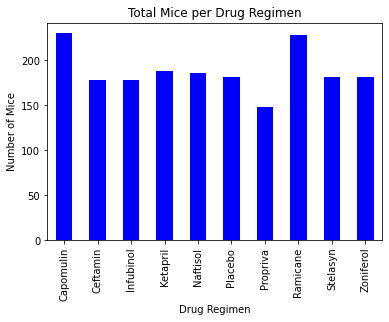

In [131]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Calculate the total number of timepoints for all mice tested
mice_tmpnts = mouse_study_reg['Mouse ID'].count()

# Chart the data, give it a title, and label the axes
mice_tmpnts_plot = mice_tmpnts.plot(kind = 'bar', facecolor = 'blue', title = 'Total Mice per Drug Regimen')
mice_tmpnts_plot.set_xlabel('Drug Regimen')
mice_tmpnts_plot.set_ylabel('Number of Mice')

<function matplotlib.pyplot.show(close=None, block=None)>

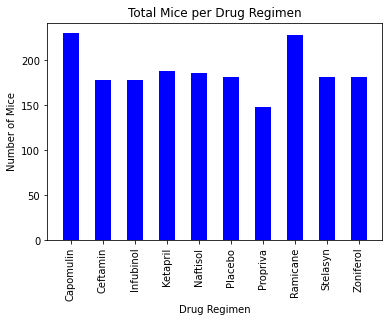

In [132]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Create a list of number of mice for each drug regimen
mice_per_drug = (mouse_study_reg['Mouse ID'].count()).tolist()

# Create a list of drug regimens
drug_regimen = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

# Set x-axis to the length of the total timepoints for all mice tested
x_axis = np.arange(len(mice_tmpnts))

# Generate a bar plot
plt.bar(x_axis, mice_per_drug, color = 'b', align = 'center', width = 0.5)

# Assign tick locations
tick_locations = [value for value in x_axis]

# Assign drug regimen names to tick locations
plt.xticks(tick_locations, drug_regimen, rotation = 'vertical')

# Provide Title and Label x and y axes and 
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title('Total Mice per Drug Regimen')

# Display plot using pyplot
plt.show

Text(0, 0.5, '')

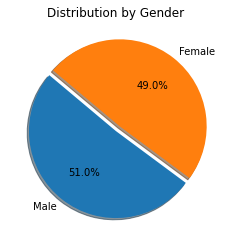

In [133]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Assign explode
explode = (0, 0.07)

# Create a dataframe based on gender
mice_group = mouse_study['Sex'].value_counts()

# Generate a pie plot based on the 
mice_pie_plot = mice_group.plot(kind="pie", explode = explode, autopct = '%1.1f%%', startangle = 140, shadow = True, title='Distribution by Gender')
mice_pie_plot.set_ylabel('')

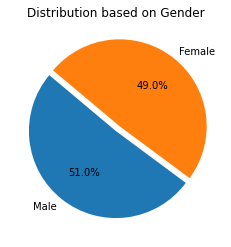

In [134]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create labels
labels = ['Female', 'Male']

# Assign explode
explode = (0, 0.07)

# Calculate counts for each gender
mice_group = mouse_study['Sex'].value_counts()

# Generate the pie plot based on gender
plt.pie(mice_group, autopct = '%1.1f%%', labels = mice_group.index.values, explode = explode, startangle = 140)
plt.title('Distribution based on Gender')
plt.show()

## Quartiles, Outliers and Boxplots

In [135]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tmpnt_df = pd.DataFrame(mouse_study.groupby('Mouse ID')['Timepoint'].max())
max_tmpnt_df.rename(columns = {'Timepoint' : 'Max Timepoint'}, inplace = 'True')

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_study_merged = pd.merge(mouse_study, max_tmpnt_df, on = 'Mouse ID')
mouse_study_merged.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [136]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Create a new subset dataframe with only the data for the treatment list
for treatment in treatment:
    treatment_df = mouse_study_merged.loc[mouse_study_merged['Drug Regimen'] == treatment]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes    
    # add subset 
    # Create a new subset dataframe with rows having final Timepoint from the treatment_df dataframe
    final_timepoint_df = treatment_df.loc[treatment_df['Timepoint'] == treatment_df['Max Timepoint']]
    
    # Create a list of all final tumor volumes 
    tumor_vol_values = final_timepoint_df['Tumor Volume (mm3)']
    tumor_vol.append(tumor_vol_values)
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Determine outliers using upper and lower bounds
    
    # Calculate the IQR for each regimen
    quartiles = tumor_vol_values.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Print the quartiles and interquartile range for each treatment
    print(f"The lower quartile of {treatment} is: {lowerq}")
    print(f"The upper quartile of {treatment} is: {upperq}")
    print(f"The interquartile range of {treatment} is: {iqr}")
    print(f"The median of {treatment} is: {quartiles[0.5]}")
    
    # Calculate the upper and lower bounds for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Print the potential outliers
    print(f"Values below lower bound: {lower_bound} could be outliers.")
    print(f"Values above upper bound: {upper_bound} could be outliers.")
    
    # Calculate the number of outliers
    outliers = (tumor_vol_values.loc[(final_timepoint_df['Tumor Volume (mm3)'] >= upper_bound) | (final_timepoint_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
   
    # Quantitatively determine if there are any potential outliers
    print(f"Number of outliers for {treatment}: {outliers}")   

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The median of Capomulin is: 38.125164399999996
Values below lower bound: 20.70456164999999 could be outliers.
Values above upper bound: 51.83201549 could be outliers.
Number of outliers for Capomulin: 0
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The median of Ramicane is: 36.56165229
Values below lower bound: 17.912664470000003 could be outliers.
Values above upper bound: 54.30681135 could be outliers.
Number of outliers for Ramicane: 0
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The median of Infubinol is: 60.16518046
Values below lower bound: 36.83290494999999 could be outliers.
Values above upper bound: 82.74144559

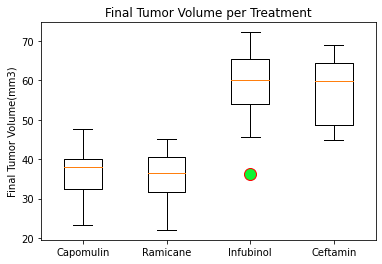

In [137]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Set color of marker edge
flierprops = dict(marker = 'o', markerfacecolor = '#0ff531', markersize = 12, linestyle = 'none', markeredgecolor='red')

# Generate the box plot
plt.boxplot(tumor_vol, flierprops = flierprops)

# Apply labels, title and xticks to the boxplot
plt.ylabel('Final Tumor Volume(mm3)')
plt.title('Final Tumor Volume per Treatment')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

# Display the boxplot
plt.show()

## Line and Scatter Plots

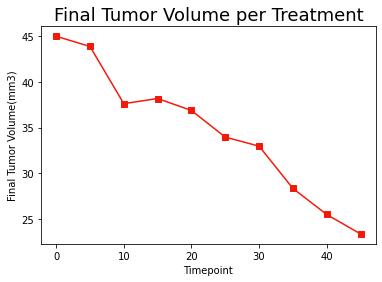

In [138]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_data = mouse_study.loc[mouse_study['Mouse ID'] == 's185']
mouse_data.head()

# Generate a line plot
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker = 's', color = '#f5190a', linewidth=1.5)

# Apply labels and title to the line plot
plt.xlabel('Timepoint')
plt.ylabel('Final Tumor Volume(mm3)')
plt.title('Final Tumor Volume per Treatment', size = 18)

# Display the line plot
plt.show()

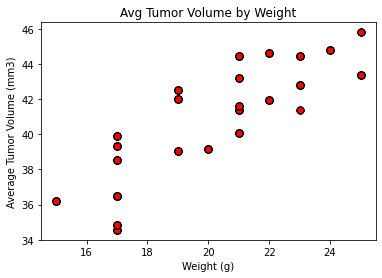

In [142]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Create a dataframe for Capomulin regimen
capomulin_data = mouse_study.loc[mouse_study['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_vol_df = pd.DataFrame(mouse_study.groupby('Mouse ID')['Tumor Volume (mm3)'].mean())
avg_tumor_vol_df.rename(columns = {'Tumor Volume (mm3)' : 'Avg Tumor Volume'}, inplace = 'True')
avg_tumor_vol_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_study_avg_tumor = pd.merge(capomulin_data, avg_tumor_vol_df, on = 'Mouse ID')

# Assign values for x and y axes
weight = mouse_study_avg_tumor['Weight (g)']
avg_tumor_vol = mouse_study_avg_tumor['Avg Tumor Volume']

# Generate scatter plot
plt.scatter(weight, avg_tumor_vol, marker = 'o', facecolors = 'red', edgecolors = 'black', s = 50, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None)

# Apply labels to axes and title for scatter plot
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Avg Tumor Volume by Weight')

# Display the scatter plot
plt.show()

## Correlation and Regression

The correlation coefficiend between Weight and Average Tumor Volume for the Capomulin regimen is 0.83


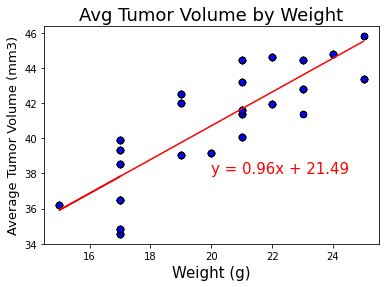

In [181]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Assign x and y values
x_values = mouse_study_avg_tumor['Weight (g)']
y_values = mouse_study_avg_tumor['Avg Tumor Volume']

# Calculate the correlation coefficient
corr_coefficient = st.pearsonr(x_values, y_values)

# Print the correlation coefficient
print(f"The correlation coefficiend between Weight and Average Tumor Volume for the Capomulin regimen is {round(corr_coefficient[0],2)}")

# Calculate the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Generate the scatter plot
plt.scatter(x_values, y_values, marker = 'o', facecolors = 'blue', edgecolors = 'black', s = 40, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None)

# Add the line to the plot
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20,38), fontsize = 15, color = 'red')

# Apply labels to axes and title for scatter plot
plt.xlabel('Weight (g)', size = 15)
plt.ylabel('Average Tumor Volume (mm3)', size = 13)
plt.title('Avg Tumor Volume by Weight', size=18)

# Display the scatter plot with the linear regression
plt.show()